#**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import geom

# **Reading the data**

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 33.4MB/s]


In [ ]:
df = pd.read_csv("aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#**1. Problem statement and Analysing basic metrics**



*   This case study is regarding the fitness equipment of the brand called **Aerofit** which produces various product such as tread mills, exercise bikes, gym equipment and fitness accessories. Here in particular, we are going to have a detailed analysis on their **product - treadmills** alone.
*   The motto is to find the target audience for each treadmill variety available, to give better recommendations to the new customer.
*   Aerofit has **3 different types of treadmills - KP281, KP481, KP781**
*   Price range for each are,
  1. KP281 - $1500, suitable for entry-level customers

  2. KP481 - $1750, suitable for mid-level runners

  3. KP781 - $2500, treadmill with advanced features justifying its price.

*   The given customer data has details about the type of treadmills they've purchased, gender, education(in years), Marital Status, Usage of treadmills/week, Fitness(self-rated), Miles expected to cover by the customers everyweek and Annual Income(in $)
*   The given data has details of 180 customers in total and has **ZERO NULL VALUES**


In [ ]:
# Shape of the data frame - 180 rows X 9 columns
df.shape

(180, 9)

In [ ]:
# Basic exploration of information given in the data and learning about its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Exploring the statistical properties of the data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df["income_cat"] = pd.cut(df["Income"], bins = [0, 45000, 60000, 105000], labels = ["low", "medium", "high"])
df["fitness_cat"] = pd.cut(df["Fitness"], bins = [0,3,4,5], labels = ["poor", "good", "excellent"])
df["age_cat"] = pd.cut(df["Age"], bins = [17, 25, 33, 50], labels = ["Youth", "Young-adults", "middle aged adults"])

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_cat,fitness_cat,age_cat
0,KP281,18,Male,14,Single,3,4,29562,112,low,good,Youth
1,KP281,19,Male,15,Single,2,3,31836,75,low,poor,Youth
2,KP281,19,Female,14,Partnered,4,3,30699,66,low,poor,Youth
3,KP281,19,Male,12,Single,3,3,32973,85,low,poor,Youth
4,KP281,20,Male,13,Partnered,4,2,35247,47,low,poor,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high,excellent,middle aged adults
176,KP781,42,Male,18,Single,5,4,89641,200,high,good,middle aged adults
177,KP781,45,Male,16,Single,5,5,90886,160,high,excellent,middle aged adults
178,KP781,47,Male,18,Partnered,4,5,104581,120,high,excellent,middle aged adults


In [ ]:
#Statistical properties of object data types in the dataframe
df.describe(include = "object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
# A basic study on frequency of the "Product" purchased by the customers across gender and marital status
pd.crosstab([df.Gender, df.MaritalStatus], [df.Product])

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered         27     15      4
       Single            13     14      3
Male   Partnered         21     21     19
       Single            19     10     14

In [ ]:
#Probability check of the products
pd.crosstab([df.Gender, df.MaritalStatus], [df.Product], normalize = "columns")

Product                KP281     KP481  KP781
Gender MaritalStatus                         
Female Partnered      0.3375  0.250000  0.100
       Single         0.1625  0.233333  0.075
Male   Partnered      0.2625  0.350000  0.475
       Single         0.2375  0.166667  0.350

In [ ]:
# Probabilty check of the products across gender and marital status
pd.crosstab([df.Gender, df.MaritalStatus], [df.Product], normalize = "index")

Product                  KP281     KP481     KP781
Gender MaritalStatus                              
Female Partnered      0.586957  0.326087  0.086957
       Single         0.433333  0.466667  0.100000
Male   Partnered      0.344262  0.344262  0.311475
       Single         0.441860  0.232558  0.325581

In [ ]:
# Probabilty check of the products across gender
pd.crosstab(df.Gender, df.Product, normalize = "index")

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [ ]:
pd.crosstab(df.Gender, df.Product, normalize = "columns")

Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.483333,0.175
Male,0.5,0.516667,0.825


#** 2. Non-Graphical Analysis**

##Value counts and Unique attributes

In [ ]:
#Types of treadmills purchased by the customers and its count
Product = df["Product"].value_counts()
Product

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
#Gender count of the customers
Gender = df["Gender"].value_counts()
Gender

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
#Age range and its count of the customers
Age = df["Age"].value_counts()
Age

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
age_cat = df["age_cat"].value_counts()
age_cat

Youth                 79
Young-adults          59
middle aged adults    42
Name: age_cat, dtype: int64

In [ ]:
#Count of unique age group in the data
df["Age"].nunique()

32

In [ ]:
#Marital status count of the customers
Marital_Status = df["MaritalStatus"].value_counts()
Marital_Status

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
# Different average no. of times a customer plans to use the treadmill each week and its count
Usage = df["Usage"].value_counts()
Usage

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
#Income range of customers and their count
Income = df["Income"].value_counts()
Income

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [ ]:
income_cat = df["income_cat"].value_counts()
income_cat

medium    89
low       49
high      42
Name: income_cat, dtype: int64

In [ ]:
#total unique count of the income
df["Income"].nunique()

62

In [ ]:
#Fitness scale of customer and its count, where 1 denotes "poor shape" and 5 denotes "excellent shape"
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
#Average no. of miles a customer expects to walk or run per week and its count
df["Miles"].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [ ]:
#Total unique miles count of customers available
df["Miles"].nunique()

37

# 3. Visual Analysis

## i. Continuous variables

Countplot to check the count of customers belonging to a certain age group.

<Axes: title={'center': 'Age count of customers'}, xlabel='Age', ylabel='count'>

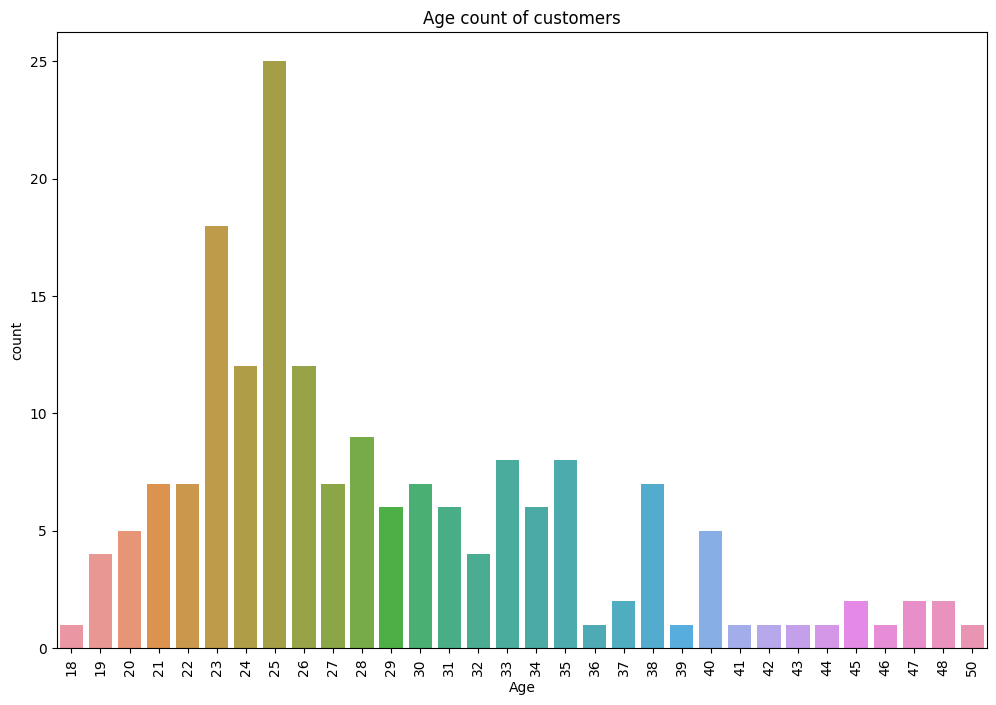

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90, fontsize = 10)
plt.title("Age count of customers")
sns.countplot(data=df, x = "Age")

Pie chart to distinguish the percentage of types of product purchased by the customer

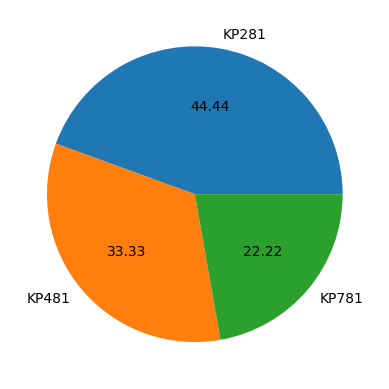

In [ ]:
from seaborn.widgets import color_palette
plt.pie(Product, labels = Product.index, autopct = "%.2f")
plt.show()

Histplot to check the dominant age range among customers

<Axes: xlabel='Age', ylabel='Count'>

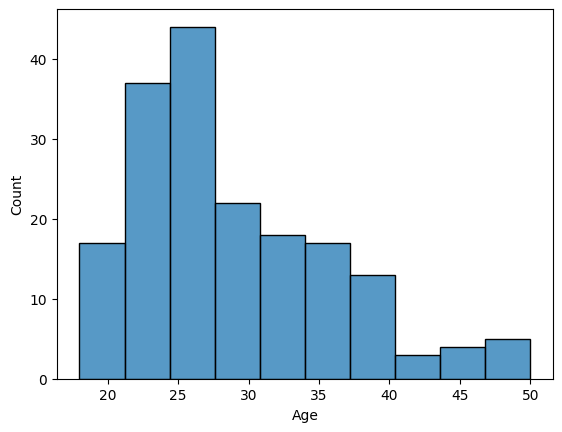

In [ ]:
sns.histplot(df["Age"], bins = 10)

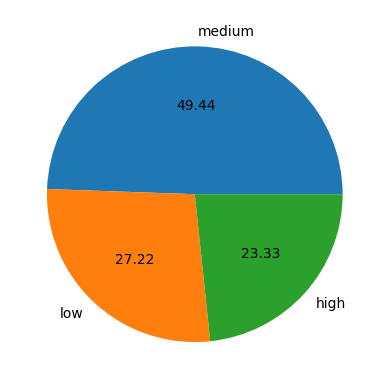

In [ ]:
from seaborn.widgets import color_palette
plt.pie(income_cat, labels = income_cat.index, autopct = "%.2f")
plt.show()

## ii. Categorical variables

Box plot to identify the type of product used by customers with varied salary groups.

<Axes: title={'center': 'Income of customer vs Type of product used'}, xlabel='Product', ylabel='Income'>

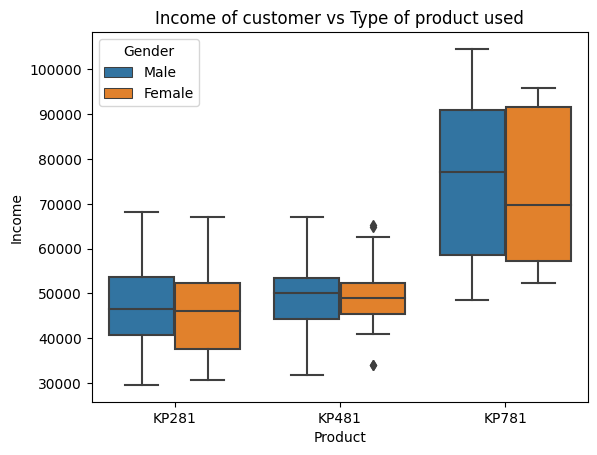

In [ ]:
plt.title("Income of customer vs Type of product used")
sns.boxplot(data = df, x= "Product", y = "Income", hue= "Gender")

<Axes: title={'center': 'Income of customer vs Gender'}, xlabel='Gender', ylabel='Income'>

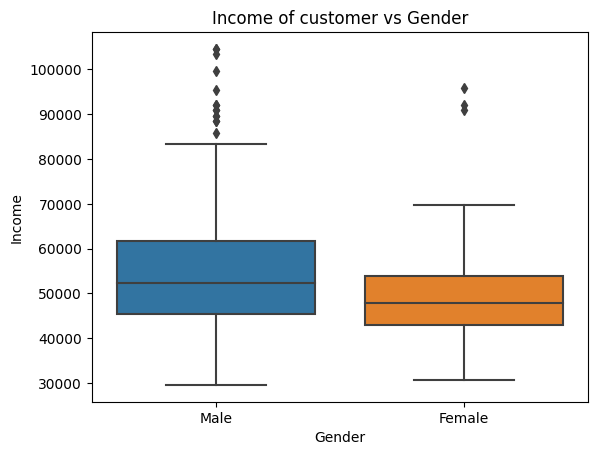

In [ ]:
plt.title("Income of customer vs Gender")
sns.boxplot(data = df, x= "Gender", y = "Income")

Stacked countplot to identify the type of product purchased across various ages pf customers

<Axes: xlabel='Age'>

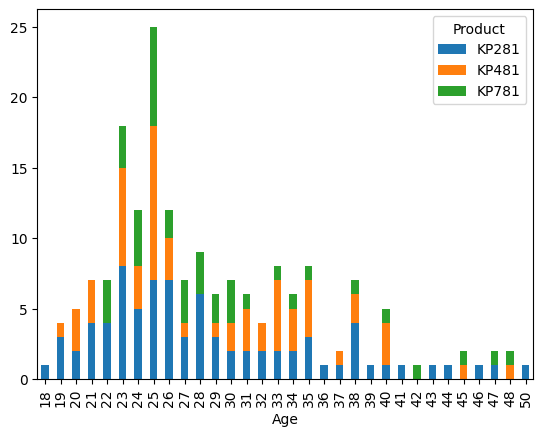

In [ ]:
df_range = df.groupby(['Product', 'Age']).size().reset_index().pivot(columns='Product', index='Age', values = 0)
df_range.plot(kind='bar', stacked=True)

Usage of treadmills across different age groups by both the gender.

<Axes: xlabel='Usage', ylabel='Age'>

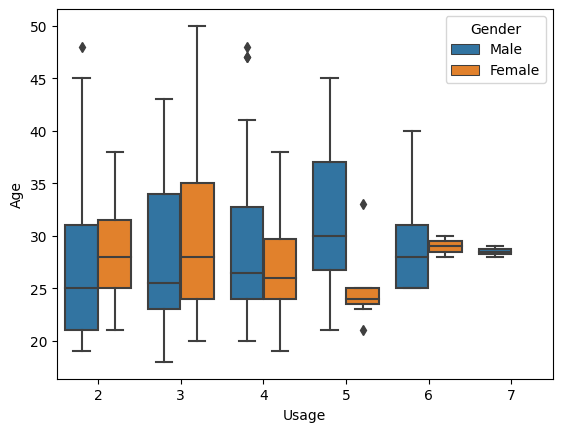

In [ ]:
sns.boxplot(data=df, x="Usage", y = "Age", hue = "Gender")

**Line plot** to determine the fitness range of customers with usage of treadmill in a week

<Axes: title={'center': 'Usage vs Fitness rate of customers'}, xlabel='Usage (Number of times treadmills used/week)', ylabel='Fitness'>

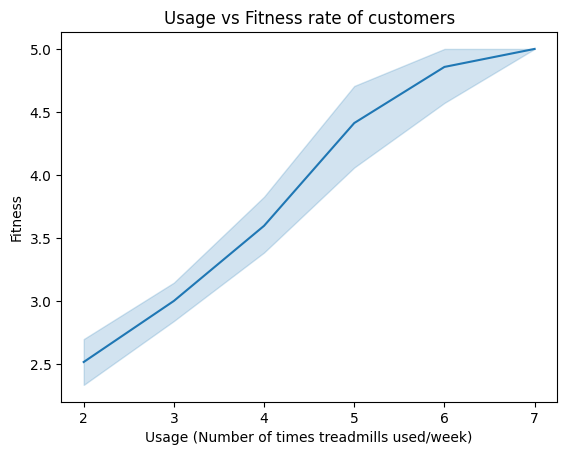

In [ ]:
plt.xlabel("Usage (Number of times treadmills used/week)")
plt.title("Usage vs Fitness rate of customers")
sns.lineplot(data= df, x= "Usage", y="Fitness")

# iii. Correlation

**Correlation of Variables**

In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Heatmap

<ipython-input-37-2ad268e580f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap = "YlGnBu")


<Axes: >

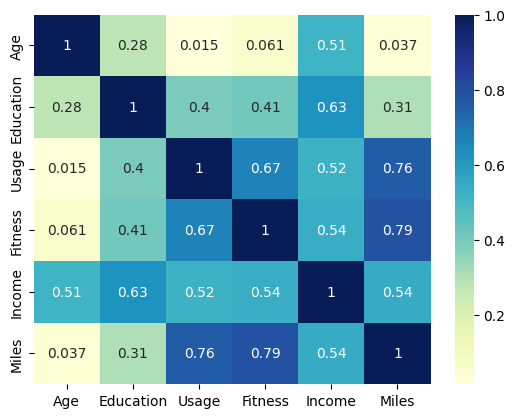

In [ ]:
sns.heatmap(df.corr(), annot= True, cmap = "YlGnBu")



---



**Pairplot comparison against all the variables in the dataframe**

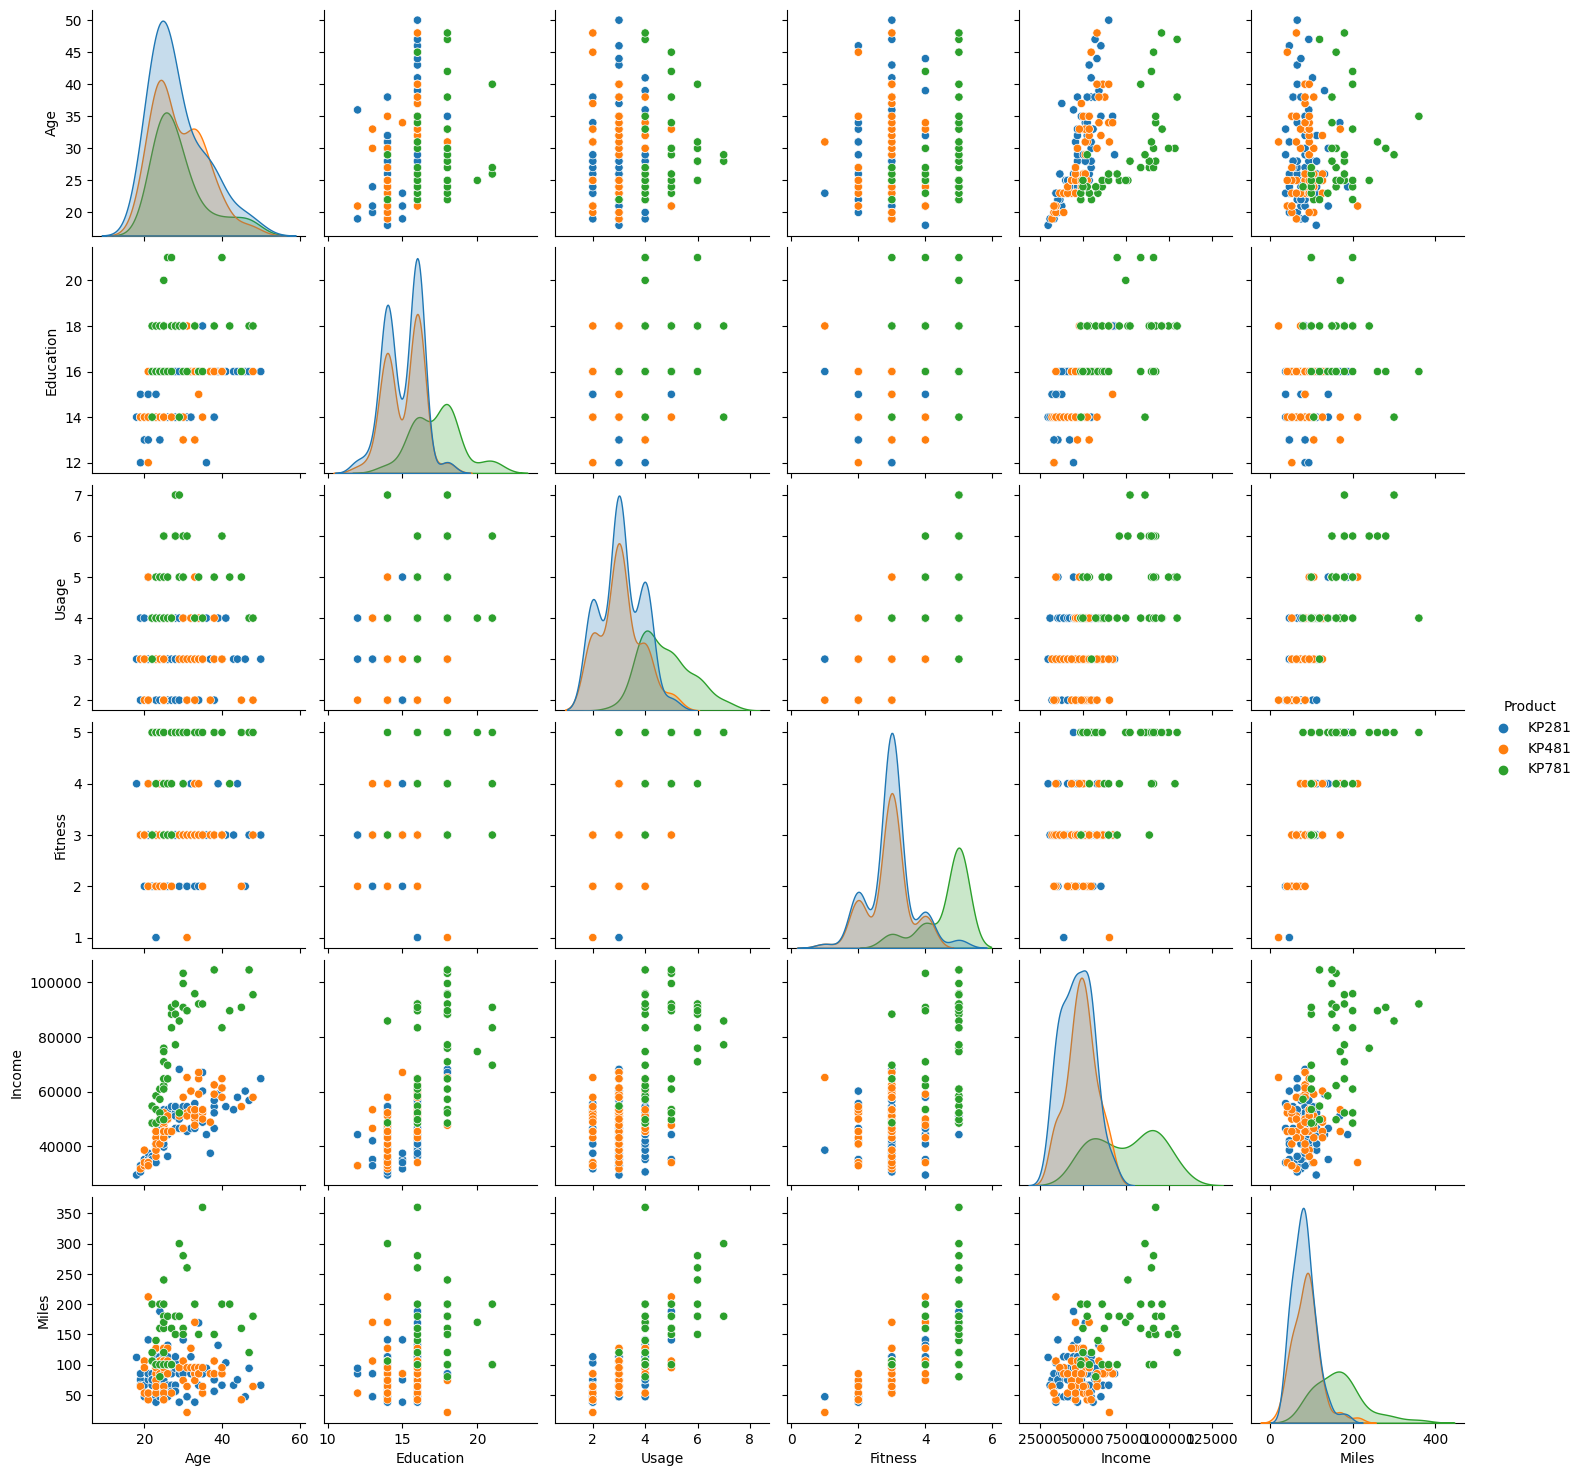

In [ ]:
sns.pairplot(data = df, hue = "Product")

#**4. Missing Values and Outlier Detection**

Though this data has NO missing values, it has a few outliers across the data spread.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Age outlier**

In [ ]:
Q1 = np.percentile(df["Age"],25)
Q2 = np.percentile(df["Age"],50)
Q3 = np.percentile(df["Age"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Age IQR :", IQR)

Q1 : 24.0
Q2 : 26.0
Q3 : 33.0
Age IQR : 9.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = Q1- (1.5*IQR)
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 46.5
Lower whisker : 10.5


<Axes: ylabel='Education'>

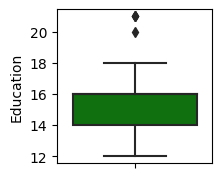

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y=df["Education"], color = "green")

**Income outlier check**

In [ ]:
Q1 = np.percentile(df["Income"],25)
Q2 = np.percentile(df["Income"],50)
Q3 = np.percentile(df["Income"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Income IQR :", IQR)

Q1 : 44058.75
Q2 : 50596.5
Q3 : 58668.0
Income IQR : 14609.25


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = Q1- (1.5*IQR)
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 80581.875
Lower whisker : 22144.875


<Axes: ylabel='Income'>

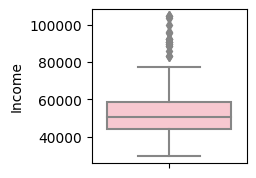

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y=df["Income"], color = "pink")

In [ ]:
income_male = df[df["Gender"]=="Male"]["Income"]
income_female = df[df["Gender"]=="Female"]["Income"]

In [ ]:
Q1 = np.percentile(income_female,25)
Q2 = np.percentile(income_female,50)
Q3 = np.percentile(income_female,75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Female income IQR :", IQR)

Q1 : 42921.75
Q2 : 47754.0
Q3 : 53796.0
Female income IQR : 10874.25


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = Q1- (1.5*IQR)
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 70107.375
Lower whisker : 26610.375


<Axes: ylabel='Miles'>

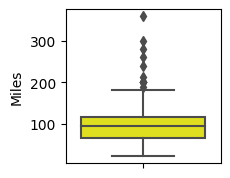

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y=df["Miles"], color = "yellow")

**Usage outlier check**

In [ ]:
Q1 = np.percentile(df["Usage"],25)
Q2 = np.percentile(df["Usage"],50)
Q3 = np.percentile(df["Usage"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Usage IQR :", IQR)


Q1 : 3.0
Q2 : 3.0
Q3 : 4.0
Usage IQR : 1.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = Q1- (1.5*IQR)
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 5.5
Lower whisker : 1.5


## **Outliers**
- In **Age** group of customers, median age is 28 and a few outliers are also present above 48 - 50
- In the **Education** of customers, median is around 15 and outliers are present above 20.
- In the **Income** of customers, median is $53,000 and other customers who receives annual income above 80,000 dollars are outliers.
- In the **Miles** expected to run by customers every week, median is around 100 miles, all the data above 200 comes under outlier category.
- In the average number of times a customer plans to use(**Usage**) the treadmill every week, median is 3.5 and all the values above 5 are counted under outliers.
- In one of the graphs observed above where usage of treadmills across different age groups by both the gender were compared and calculated, among that females who have usage of 5 has a median of 25 and also has some outliers among early 20s and early 30s age range.
- In another comparison between the type of product used by customers across varied salary groups, KP481 treadmills are mostly owned by females with income around 50,000 dollars, some with 33,000 dollars and 64,000 dollars also owns the same product are outliers in the group.



# **5.Business insights based on Non-graphical and visual analysis**

## **i. Range of attributes**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


*   Product (ie) types of treadmills available values from 1500 to 2,500 dollars
*   "Age" range of customers are from 18 to 50.
*   Years of education received by customers are between 12 to 21.
*   Average number of times the customer plans to use the treadmill lies between 2 to 7 times/week.
*   Fitness scale of customers are self-rated and it's between 1(poor shape) to 5(excellent)
*   Annual income of users ranges around $29,562 to 104581 dollars.
*   Average number of miles an user expects to walk/run per week ranges between 21 to 360.
*   Among the male and female users, male ones are dominant in number(104) and 76 females.
*   Marital status shows that 107 customers are partnered(married) and 73 are single.




## **ii.Distribution of variables and relationships between them**

- Among the given products, the type of treadmills which are owned by maximum customers are **KP281 - 80 numbers**, which is worth 1500 dollars, followed by **KP481 - owned by 60 members**, which is worth 1750 dollars. The final product **KP781 - which is owned by 40 members** is the most expensive one among all with many advanced features, hence came around $2500.
- Of the total members who are the customers of Aerofit, Male seems to be the most dominating gender(ie) 104/180 members are **male alone, which is 57% of treadmill customers**. And the rest 74 are female.
- 32 unique age groups, ranging from 18-50 are members of treadmills, of which most users are present in **20-30 age range**.
- Marital status of the customers shows **107 are partnered** and **73 are single** users.
- The average number of times a customer plans to use the treadmill each week lies around **3 times the most, almost 69 members** have mentioned the same count followed by **4 times/week, as told by 52 members**, these two counts alone make upto **67%** of the total users plan of use. 33 users prefers to use it twice a week and if we add that **85% of users falls in 2-4 range.**
- Annual income range of customers are very diverse, a total of 62 different numbers are mentioned as income, of which 14 members have mentioned 45,480 dollars/year, which is the most common value, followed by 52,302 by 9 members. On a rough observation it can be said the most users belongs to 45,000 to 55,000 range of income.
- On the scale of 1 to 5, if the users are rated, poor, low, moderate, good and excellent shape given the fitness ratings by them, **97 members belongs to the moderate(3 rated) shape category**, which alone makes upto 53% of users. Rest 31 users have given themselves(5 ratings - meaning excellent shape), that is 17% of users are believed to completely fit. 26 users rated themselves 2 and 24 users rated themselves 4, which together makes upto 27% of the total users.
- Around 37 unique average numbers of miles run/walked using treadmill each week have been noticed. 27 users have the most common number of miles run/week which is 85. Followed by 95 miles by 12 users, 66 miles by 10 users and 75 miles by 10 users.


## **iii. Univariate and bivariate plot analysis**

### Univariate analysis:
- An **univariate countplot** was created on Age of customers, on analysis it is found that maximum treadmill users(25 numbers) belongs to 25 age group. Second highest being 23 age group(18 numbers)
- Another univariate analysis was made of the type of product used by the customers and the result of **pie chart shows that, 44.44% are KP281 users**, 33.33% are KP481 users and 22.22% are KP781 users.
- A histogram analysis with differentt age group were done using 10 bins, in which maximum users belongs to 24-26 age range(40+ users), second highest range is between 21-23.

### Bivariate/Multivariate analysis:
- A **bivariate analysis was done using box plot** to find out what are the range of **income across genders for all the three types of treadmills** and from the results, its clear that, people whose annual **salary range is around 40000-55000 dollars prefer KP281**, which is the cheapest of all, especially female. **KP481 is owned by those whose annual salary range is above 40,000 dollars.** And the most expensive treadmills of all, **KP781 is owned only by those whose annual salary is above 60,000**. Eventhough the prices of treadmills were fixed based on the advancements of features in each, salary also plays a major part in owning a specific type of it.
- An analysis was already conducted to see which age group owns most of treadmills. Another **stacked count plot was created to analyse which kind of treadmills are owned by most of these age groups**, and from that it's observed that age 23 and 25 who owns most of treadmills prefer KP481 more than the other two, **While KP281 is the only type which is spread across all age groups from 18-50**.
- Another boxplot was created to find the "Usage" of treadmills across different age groups by both the gender. It was already observed that the common usage for most of the users were around 2-4, of which male rate is higher and the age ranges from 20-35. Females with 5/6 usage of age group 25 and 30 respectively as for males, its spread out between 25 to 37(for 5) and 25-30(for 6). **7 usage is observed only in males** and their **age lies around 29.**
- A **lineplot** analysis was made to determine the fitness range of customers in comparison with the usage of treadmill in a week, and the graph clearly indicates that **with the increase in usage, there is a gradual rise in the fitness level of the users**, which conveys that more the usage, better the fitness.

### Heatmaps/Pairplots
- **Heat map** was created amongst all the variables present in the dataset, highest values are observed between **Miles vs Fitness(0.79)**, **Usage vs Miles(0.76) and fitness vs usage(0.67)**. Lowest were observed between **Usage vs Age(0.015), Fitness vs Age(0.061), Miles vs Age(0.037)**. These values are a clear cut implication that, **"the higher the usage of treadmills, the more miles are run which is directly proportional to the fitness of the person"**.
- **Pair plot** was created using all the variables and was tested against the product types available. Most of the observations were discussed earlier but for education column, it's observed that users with mid - higher years of education has more fitness, usage, miles, income and age. Precisely tells us that the people who spent more time on studies also tend spend more time working out.

# **6. Recommendations**

- When the probability ratio between male and female was observed among the 3 different products, it is observed that **distribution of male and female are almost equal for both KP281 and KP481.** Whereas, a drastic difference was observed **in KP781, where male probability was equal to 0.825** and female - 0.175, which can say that female mostly don't prefer these highly advanced treadmills and hence the **target audience for KP281 AND KP481 are female**, while male can work with any of the three depending on their suitability and hence should be recommended to the customers likewise.
- Also, since female mostly prefer the 1st two kinds, modifications can be done in both the devices, with some advancements, it'll be clearly benefitting the users and will also invite more customers through word of mouth, if found effective.
- when looked at the probability of owning of treadmills by users with different marital status, clear dominanace is observed by partnered users in all 3 types but a slight increase in probability was observed in KP781 for single users, hence **single users with better usage and fitness should be introduced to KP781.**
- Based on their source of income and their own usage, users should be introduced to the following types:
    * Annual income - $35000 - 55000, KP281 and KP481 would be feasible.
    * **Annual income - $60,000, KP781 will be more feasible(if the required fitness level is met and they are not new to the workout routine)**
- If users are welcome to use the treadmill for more than 5 times a week, KP781 will be the most suitable kind.
- If the users wants to achieve better fitness, again KP781 is the most suitable since it has alot of advanced features but for a **beginner, KP281 will be the most suitable** KP281.
- People who've spend more years in study than average are obviously in need of more leisure time, and workout can help them relieve from the stress, if they're welcome to vigourous routine, then KP481 or KP781 would be apt for them, since their dedication will be assumed to be certain than others.
- Customers who belongs to **20-35 years of age**, with good income and interest in fitness routine should be introduced to KP481 and KP781 given the numbers but if they're **a beginner then KP281 would be the apt choice**.
